In [3]:
import os
import zipfile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def extract_file(file_path):
    zipped = zipfile.ZipFile(file_path,'r')
    zipped.extractall('./')
    zipped.close()

extract_file('/content/cifar-3class-data.zip')
def Load_data(path):
    images = []
    labels = []
    for class_ in os.listdir(path):
        class_path = os.path.join(path,class_) # to join Class_i to path

        for img in os.listdir(class_path):
            img_path = os.path.join(class_path,img)
            image = Image.open(img_path)
            images.append(image)
            labels.append(int(class_[-1]))

    return np.array(images)/255,np.array(labels)
train_path = './cifar-3class-data/train/'
test_path = './cifar-3class-data/test/'
train,ytrain = Load_data(train_path)
test,ytest = Load_data(test_path)
print(train.shape)
print(ytrain.shape)
print(test.shape)
print(ytest.shape)

(1500, 32, 32, 3)
(1500,)
(300, 32, 32, 3)
(300,)


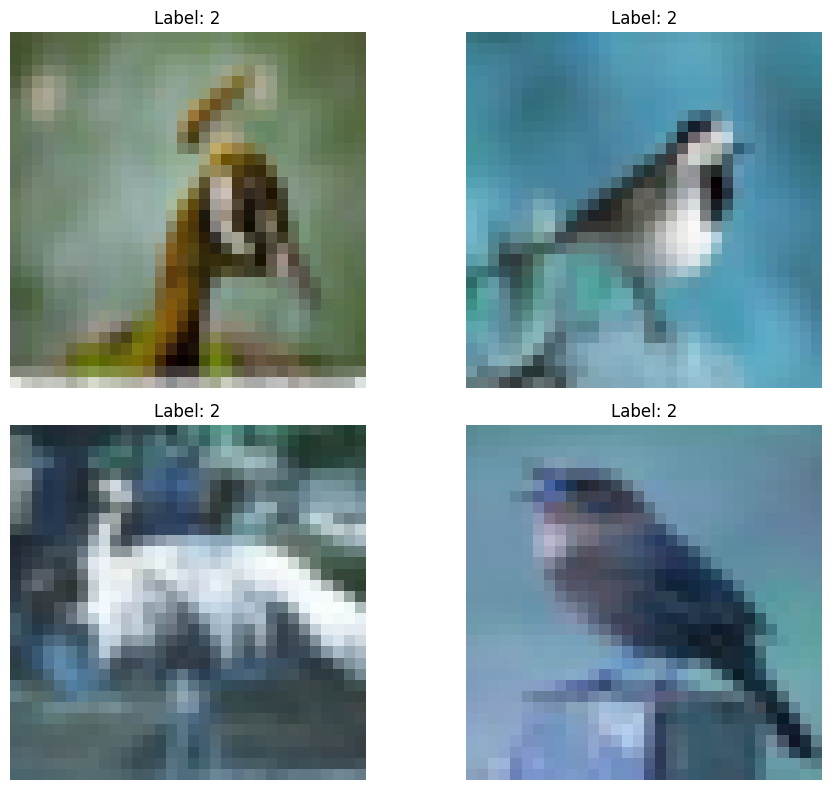

In [4]:
plt.figure(figsize=(10, 8))
for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(train[i])
        plt.title(f"Label: {ytrain[i]}")
        plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train,val,ytrain,y_valid = train_test_split(train,ytrain,test_size = 0.1,random_state=42)
print(len(train),len(ytrain))
print(len(val),len(y_valid))

1350 1350
150 150


In [6]:
train.shape

(1350, 32, 32, 3)

In [7]:
def flattening(data):
    vector_1d = []
    num_images,len,width,height=data.shape[0],data.shape[1],data.shape[2],data.shape[3]
    for m in range(num_images):
        flatten = []
        for i in range(len):
            for j in range(width):
                for k in range(height):
                    flatten.append(data[m][i][j][k])

        vector_1d.append(flatten)
    return np.array(vector_1d)
train_1d=flattening(train)
valid_1d=flattening(val)
print(train_1d.shape)                                         #for each image we have created 1D tensor

(1350, 3072)


In [8]:
!pip install keras.models
!pip install keras.layers


ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers


In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(256,activation='relu',input_shape = (32*32*3,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax')) # 3 output so as to get probability of test case to lie in all 3 classes
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_1d,ytrain,validation_data=(valid_1d,y_valid),batch_size=200,epochs=500)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.3262 - loss: 1.3235 - val_accuracy: 0.3333 - val_loss: 1.1044
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3996 - loss: 1.1107 - val_accuracy: 0.3933 - val_loss: 1.0624
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4881 - loss: 0.9928 - val_accuracy: 0.4533 - val_loss: 0.9683
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5526 - loss: 0.9294 - val_accuracy: 0.5600 - val_loss: 0.9138
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5726 - loss: 0.8939 - val_accuracy: 0.7067 - val_loss: 0.8139
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6456 - loss: 0.8480 - val_accuracy: 0.6800 - val_loss: 0.8176
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6678 - loss: 0.8120 - val_accuracy: 0.7333 - val_loss: 0.7595
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6803 - loss: 0.7943 - val_accuracy: 0.7667 - val_loss

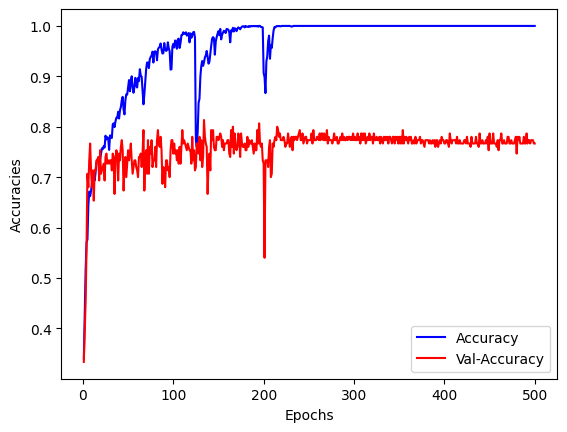

In [10]:
def Plot_Accuracy(history,xlen):
    plt.plot(np.arange(1,xlen+1),history.history['accuracy'],c = 'b',label = 'Accuracy')
    plt.plot(np.arange(1,xlen+1),history.history['val_accuracy'],c = 'r',label = 'Val-Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.legend()
    plt.show()
Plot_Accuracy(history,500)

In [11]:
def Model_Accuracy(ytest,pred_y):
    wrong_count = 0
    for i in range(len(ytest)): wrong_count += (ytest[i] != pred_y[i])

    acc1 = round((len(ytest) - wrong_count)/len(ytest) * 100,2)

    print(f"Accuracy  = {acc1}%")

In [12]:
test_1d=flattening(test)
pred_y = model.predict(test_1d)
pred_y = [np.where(pred_y[i] == max(pred_y[i]))[0][0] for i in range(pred_y.shape[0])]
Model_Accuracy(ytest,pred_y)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy  = 74.33%


In [13]:
loss = model.evaluate(test_1d,ytest)[0]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7598 - loss: 1.9300 


**CNN MODEL**

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

model_cnn = Sequential()
model_cnn.add(Conv2D(64,(3,3),input_shape = (32,32,3),padding='same',activation='relu'))
model_cnn.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model_cnn.add(MaxPooling2D((2,2),padding='valid'))

model_cnn.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model_cnn.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model_cnn.add(MaxPooling2D((2,2),padding='valid'))

model_cnn.add(Flatten())

model_cnn.add(Dense(512,activation='relu'))
model_cnn.add(Dense(100,activation='relu'))

model_cnn.add(Dense(3,activation='softmax'))
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history_cnn = model_cnn.fit(train,ytrain,validation_data=(val,y_valid),batch_size=200,epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.3257 - loss: 1.1328 - val_accuracy: 0.2733 - val_loss: 1.0959
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4044 - loss: 1.0511 - val_accuracy: 0.5600 - val_loss: 0.9847
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6430 - loss: 0.8771 - val_accuracy: 0.6267 - val_loss: 0.9018
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6385 - loss: 0.8282 - val_accuracy: 0.6733 - val_loss: 0.7523
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7087 - loss: 0.7071 - val_accuracy: 0.8000 - val_loss: 0.5453
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7695 - loss: 0.5658 - val_accuracy: 0.8000 - val_loss: 0.5180
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7610 - loss: 0.5678 - val_accuracy: 0.8200 - val_loss: 0.4888
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7985 - loss: 0.5306 - val_accuracy: 0.8133 - val_loss: 0.4447
Epoch 9/

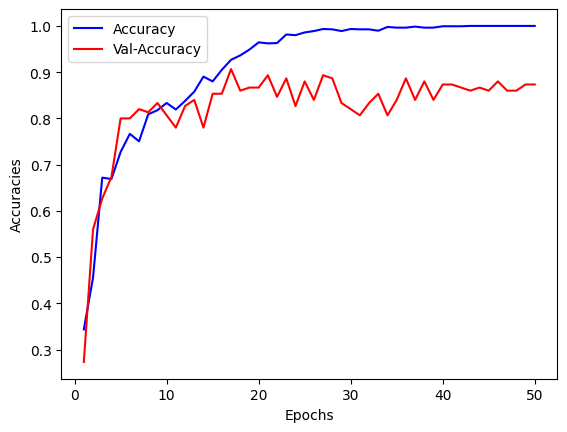

In [18]:
Plot_Accuracy(history_cnn,50)

In [19]:
pred_y=model_cnn.predict(test)
pred_y = [np.where(pred_y[i] == max(pred_y[i]))[0][0] for i in range(pred_y.shape[0])]
Model_Accuracy(ytest,pred_y)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
Accuracy  = 82.33%


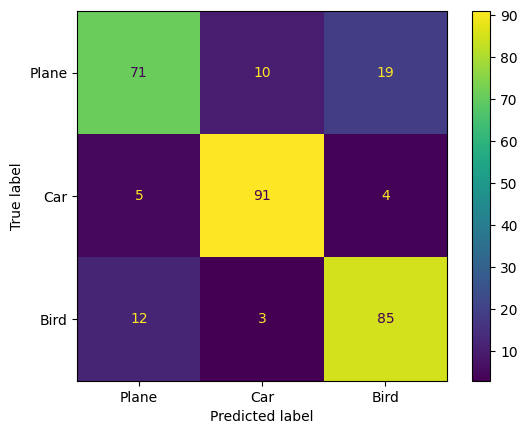

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
CM = confusion_matrix(ytest,pred_y)
ConfusionMatrixDisplay(CM,display_labels=['Plane','Car','Bird']).plot()